<a href="https://colab.research.google.com/github/reshmi416/PRODIGYINFOTECH_DS_4/blob/main/PRODIGYINFOTECH_DS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Files in /content/ directory after extraction:
['.config', 'twitter_validation.csv', 'sentiment analysis.zip', 'sample_data', 'twitter_training.csv', '.ipynb_checkpoints']
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     

Column names:
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


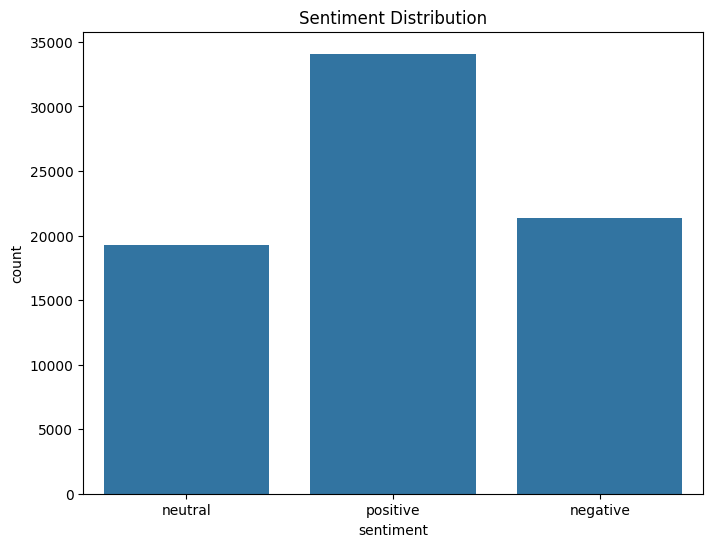

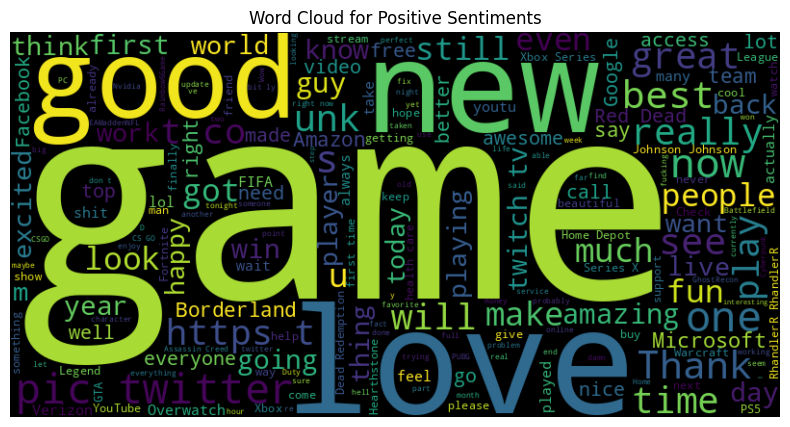

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from zipfile import ZipFile
import os

# Extract the ZIP file
with ZipFile('/content/sentiment analysis.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# List the files in /content/ directory after extraction
print("Files in /content/ directory after extraction:")
print(os.listdir('/content/'))

# Load dataset
data = pd.read_csv('/content/twitter_training.csv')

# Display the first few rows of the dataset
print(data.head())

# Print column names to identify the correct text column
print("\nColumn names:")
print(data.columns)

# Perform sentiment analysis using the correct text column
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Assuming the text column is the fourth column based on the provided data snippet
data['text'] = data.iloc[:, 3].astype(str)  # Convert to string
data['sentiment'] = data['text'].apply(analyze_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

# Visualize sentiment trends over time
# Assuming there's a 'created_at' column for timestamp
# If not, you can skip this part or use another time-related column if available
if 'created_at' in data.columns:
    data['created_at'] = pd.to_datetime(data['created_at'])
    data.set_index('created_at', inplace=True)
    data['sentiment'].resample('D').apply(lambda x: (x=='positive').sum()).plot()
    data['sentiment'].resample('D').apply(lambda x: (x=='negative').sum()).plot()
    data['sentiment'].resample('D').apply(lambda x: (x=='neutral').sum()).plot()
    plt.title('Sentiment Trends Over Time')
    plt.legend(['positive', 'negative', 'neutral'])
    plt.show()

# Generate word cloud for positive tweets
positive_text = ' '.join(data[data['sentiment']=='positive']['text'])
wordcloud = WordCloud(width=800, height=400).generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()
